<a href="https://colab.research.google.com/github/ollihansen90/zeugs/blob/main/Levenshtein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget -nc -q https://raw.githubusercontent.com/ollihansen90/wortlisten/main/apfelsorten.txt
!wget -nc -q https://raw.githubusercontent.com/ollihansen90/wortlisten/main/laender.txt
!wget -nc -q https://raw.githubusercontent.com/ollihansen90/wortlisten/main/deutsche_woerter_kurz.txt
!wget -nc -q https://raw.githubusercontent.com/ollihansen90/wortlisten/main/staedtenamen.txt
!wget -nc -q https://raw.githubusercontent.com/ollihansen90/wortlisten/main/harrypotternames.txt

with open("apfelsorten.txt", "r") as file:
    apfelsorten = file.read().split("\n")

with open("laender.txt", "r") as file:
    laendernamen = file.read().split("\n")

with open("deutsche_woerter_kurz.txt", "r") as file:
    woerter = file.read().split("\n")

with open("staedtenamen.txt", "r") as file:
    staedte = file.read().split("\n")
with open("harrypotternames.txt", "r") as file:
    harrypotter = file.read().split("\n")

apfelsorten = list(set(apfelsorten))
laendernamen = list(set(laendernamen))
woerter = list(set(woerter))
staedte = list(set(staedte))
print(len(apfelsorten), "Apfelsorten geladen")
print(len(laendernamen), "Ländernamen geladen")
print(len(woerter), "Wörter geladen")
print(len(staedte), "Städte geladen")
print(len(harrypotter), "harrypotter geladen")

8401 Apfelsorten geladen
204 Ländernamen geladen
177425 Wörter geladen
2049 Städte geladen
705 harrypotter geladen


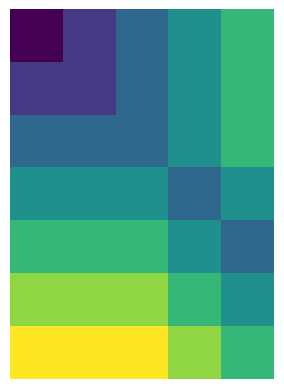

╒═══╤═══╤═══╤═══╤═══╤═══╕
│   │ - │ H │ u │ n │ d │
├───┼───┼───┼───┼───┼───┤
│ - │ 0 │ 1 │ 2 │ 3 │ 4 │
├───┼───┼───┼───┼───┼───┤
│ W │ 1 │ 1 │ 2 │ 3 │ 4 │
├───┼───┼───┼───┼───┼───┤
│ a │ 2 │ 2 │ 2 │ 3 │ 4 │
├───┼───┼───┼───┼───┼───┤
│ n │ 3 │ 3 │ 3 │ 2 │ 3 │
├───┼───┼───┼───┼───┼───┤
│ d │ 4 │ 4 │ 4 │ 3 │ 2 │
├───┼───┼───┼───┼───┼───┤
│ e │ 5 │ 5 │ 5 │ 4 │ 3 │
├───┼───┼───┼───┼───┼───┤
│ l │ 6 │ 6 │ 6 │ 5 │ 4 │
╘═══╧═══╧═══╧═══╧═══╧═══╛


In [7]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

def levenshtein(wort1, wort2, substitution=1, maxval=10000):
    wort1 = wort1.upper()
    wort2 = wort2.upper()
    data = np.zeros([len(wort2)+1, len(wort1)+1])
    data[0] = np.arange(0,len(wort1)+1)
    data[:,0] = np.arange(0,len(wort2)+1)

    for i in range(1, len(wort2)+1):
        for j in range(1, len(wort1)+1):
            if wort2[i-1]==wort1[j-1]:
                data[i,j] = data[i-1, j-1]
            else:
                data[i,j] = min([data[i-1,j]+1, data[i,j-1]+1, data[i-1,j-1]+substitution])
    return data

def draw_table():
    table = [list(" -"+wort1)]
    table.append(["-"]+ list(data[0]))
    for i in range(len(wort2)):
        table.append([wort2[i]]+ list(data[i+1]))

    plt.figure()
    plt.imshow(data)
    plt.axis("off")
    plt.show()

    print(tabulate(table, tablefmt="fancy_grid"))

wort1 = "Hund"
wort2 = "Wandel"
data = levenshtein(wort1, wort2, 1).astype(int)
draw_table()

In [5]:
name = "GunMarit"
liste = []

for sorte in tqdm(apfelsorten):
    if 0.8*len(sorte)<len(sorte)<1.2*len(sorte):
        liste.append([sorte, levenshtein(name, sorte)[-1,-1]])

liste = sorted(liste, key=lambda x: x[1])
print(*liste[:20], sep="\n")

  0%|          | 0/8401 [00:00<?, ?it/s]

['Gunma', np.float64(3.0)]
['Ontario', np.float64(4.0)]
['Junami', np.float64(4.0)]
['Marie', np.float64(4.0)]
['Sunset', np.float64(5.0)]
['Antares', np.float64(5.0)]
['Fantasia', np.float64(5.0)]
['Sunlight', np.float64(5.0)]
['Zulmas', np.float64(5.0)]
['Mai', np.float64(5.0)]
['Bismarck', np.float64(5.0)]
['Galarina', np.float64(5.0)]
['Sundance', np.float64(5.0)]
['Nonpareil', np.float64(5.0)]
['Marina', np.float64(5.0)]
['Iunost', np.float64(5.0)]
['Gloria', np.float64(5.0)]
['Noris', np.float64(5.0)]
['Auralia', np.float64(5.0)]
['Sunburn', np.float64(5.0)]


In [8]:
def ngram(wort, n=3):
    output = []
    for i in range(len(wort)-n+1):
        output.append(wort[i:i+n])
    return output

def jaccard(wort1, wort2, n=2):
    ngram1 = set(ngram(wort1.upper(), n))
    ngram2 = set(ngram(wort2.upper(), n))

    schnitt = ngram1.intersection(ngram2)
    vereinigung = ngram1.union(ngram2)
    return len(schnitt)/len(vereinigung)

name = "Harry Potter"
n = 2 # if len(name)<5 else 3
liste = []
vorsortiert = []

for sorte in tqdm(harrypotter):
    jj = jaccard(name, sorte, n=n)
    vorsortiert.append([sorte, jj])

for sorte, jj in tqdm(sorted(vorsortiert, key=lambda x: x[1], reverse=True)[:20]):
    liste.append([sorte, jj, levenshtein(name, sorte)[-1,-1]])


liste = sorted(liste, key=lambda x: x[-1], reverse=False)
print(*liste, sep="\n")

  0%|          | 0/705 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

['Harry Potter', 1.0, np.float64(0.0)]
['Charlus Potter', 0.5, np.float64(4.0)]
['Lily Potter', 0.5, np.float64(4.0)]
['James Potter', 0.375, np.float64(4.0)]
['Albus Potter', 0.375, np.float64(5.0)]
['Terry Boot', 0.42857142857142855, np.float64(6.0)]
['Abraham Potter', 0.4117647058823529, np.float64(6.0)]
['Harper', 0.23076923076923078, np.float64(6.0)]
['Roddy Pontner', 0.21052631578947367, np.float64(6.0)]
['Barry Ryan', 0.26666666666666666, np.float64(7.0)]
['Mary Cattermole', 0.3157894736842105, np.float64(8.0)]
['Warty Harris', 0.23529411764705882, np.float64(8.0)]
['Nugent Potts', 0.2222222222222222, np.float64(8.0)]
['Yardley Platt', 0.21052631578947367, np.float64(8.0)]
['Lily Luna Potter', 0.3684210526315789, np.float64(9.0)]
['James Sirius Potter', 0.2727272727272727, np.float64(10.0)]
['Arkie Philpott', 0.2631578947368421, np.float64(10.0)]
['Walter Parkin', 0.21052631578947367, np.float64(10.0)]
['Peter Pettigrew', 0.21052631578947367, np.float64(10.0)]
['Albus Severus Po

In [ ]:
print(levenshtein("dustin", "stein"))
print(jaccard("dustin", "stein"))

[[0. 1. 2. 3. 4. 5. 6.]
 [1. 1. 2. 2. 3. 4. 5.]
 [2. 2. 2. 3. 2. 3. 4.]
 [3. 3. 3. 3. 3. 3. 4.]
 [4. 4. 4. 4. 4. 3. 4.]
 [5. 5. 5. 5. 5. 4. 3.]]
0.2857142857142857
